In [20]:
import pandas as pd
content = pd.read_csv('Content.csv')
reaction = pd.read_csv('Reactions.csv')
reaction_type = pd.read_csv('Reactiontypes.csv')


In [21]:
# Remove the Unnamed column
content = content.drop('Unnamed: 0', axis=1)

# Change the name of Type column to Content_Type
content = content.rename(columns={'Type': 'Content_Type'})

# Drop User ID column
content = content.drop('User ID', axis=1)
content = content.drop('URL', axis=1)

# Drop null values
content = content.dropna()

# Drop duplicate rows
content = content.drop_duplicates()

# Print the cleaned dataset
print(content.head())

                             Content ID Content_Type        Category
0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        Studying
1  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo  healthy eating
2  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo  healthy eating
3  356fff80-da4d-4785-9f43-bc1261031dc6        photo      technology
4  01ab84dd-6364-4236-abbb-3f237db77180        video            food


In [22]:


# Remove the Unnamed column
reaction = reaction.loc[:, ~reaction.columns.str.contains('^Unnamed')]

# Rename the Type column
reaction = reaction.rename(columns={'Type': 'reaction_type'})

# Drop User ID column
reaction = reaction.drop('User ID', axis=1)

# Drop nulls
reaction = reaction.dropna()

# Drop duplicates
reaction = reaction.drop_duplicates()
# change the to date type
reaction['Datetime'] = pd.to_datetime(reaction['Datetime'])

# Print the cleaned dataset
print(reaction.head())


                             Content ID reaction_type            Datetime
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust 2020-11-07 09:43:50
2  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike 2021-06-17 12:22:51
3  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared 2021-04-18 05:13:58
4  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust 2021-01-06 19:13:01
5  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested 2020-08-23 12:25:58


In [25]:
reaction_type

,reaction_type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [24]:
# Remove the Unnamed: 0 column:
reaction_type = reaction_type.drop('Unnamed: 0', axis=1)
# Rename the Type column to reaction:
reaction_type = reaction_type.rename(columns={'Type': 'reaction_type'})
# drop nulls
reaction_type = reaction_type.dropna()
# drop duplicates
reaction_type = reaction_type.drop_duplicates()


In [28]:
# Merge the content and reaction tables
merged_df = pd.merge(content, reaction, on='Content ID')

# Merge the merged_df with the reaction_type table
final_df = pd.merge(merged_df, reaction_type, on='reaction_type')

# Display the final dataframe
print(final_df.head())

                             Content ID Content_Type        Category  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        Studying   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        Studying   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        Studying   
3  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo  healthy eating   
4  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo  healthy eating   

  reaction_type            Datetime Sentiment  Score  
0       disgust 2020-11-07 09:43:50  negative      0  
1       disgust 2021-01-06 19:13:01  negative      0  
2       disgust 2021-04-09 02:46:20  negative      0  
3       disgust 2021-03-28 21:15:26  negative      0  
4       disgust 2020-08-04 05:40:33  negative      0  


In [29]:
final_df.head()

,Content ID,Content_Type,Category,reaction_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


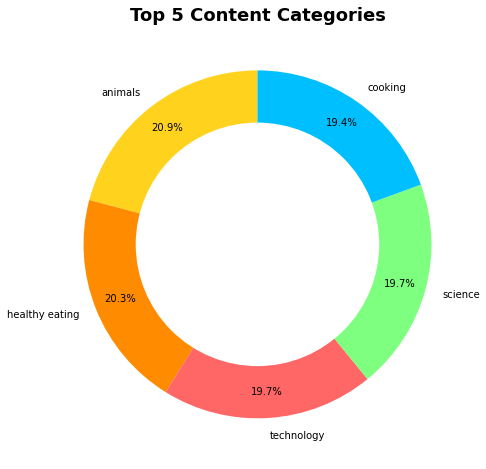

In [30]:
import matplotlib.pyplot as plt

# Get the top 5 categories
top_categories = final_df['Category'].value_counts().nlargest(5)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=['#ffd31d', '#ff8c00', '#ff6666', '#7fff7f', '#00bfff'])

# Add a circle at the center to create a donut chart
circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(circle)

# Add a title
ax.set_title('Top 5 Content Categories', fontsize=18, fontweight='bold')

# Show the chart
plt.show()


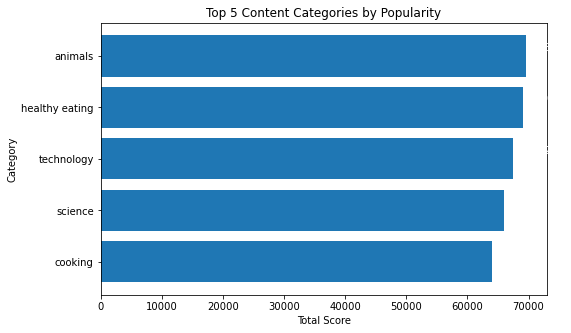

In [34]:
import matplotlib.pyplot as plt

# Get the top 5 categories by summing the 'Score' column
top_categories = final_df.groupby('Category')['Score'].sum().nlargest(5)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_categories.index, top_categories.values)

# Set chart title and axis labels
ax.set_title('Top 5 Content Categories by Popularity')
ax.set_xlabel('Total Score')
ax.set_ylabel('Category')

# Invert y-axis to show highest score on top
ax.invert_yaxis()

# Add values above the bars
for i, v in enumerate(top_categories.values):
    ax.text(v + 1000, i - 0.1, str(v), color='white')

# Show the plot
plt.show()


🎯 Observation: One interesting insight from the count of reactions by category is that animals and healthy eating seem to be the most popular categories with the highest number of reactions, followed closely by technology and science. Cooking seems to be the least popular category among the users, with the lowest number of reactions.

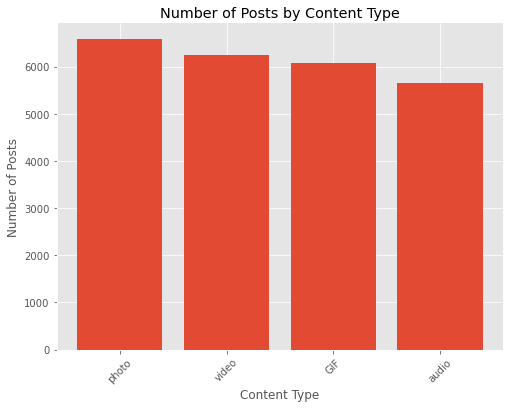

In [47]:


# Group by content type and count the number of entries in each group
content_type_counts = final_df.groupby('Content_Type').size().reset_index(name='counts')

# Sort the content type counts in descending order
content_type_counts = content_type_counts.sort_values('counts', ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(content_type_counts['Content_Type'], content_type_counts['counts'])

# Set the chart title and labels
ax.set_title('Number of Posts by Content Type')
ax.set_xlabel('Content Type')
ax.set_ylabel('Number of Posts')

# Rotate the x-axis labels to 45 degrees for readability
plt.xticks(rotation=45)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Display the chart
plt.show()


In [50]:
content_type_counts

,Content_Type,counts
2,photo,6589
3,video,6245
0,GIF,6079
1,audio,5660


🎯 Observation: This data shows that among the four content types, photos are the most commonly shared, with a count of 6589. Videos come in second with 6245, followed by GIFs with 6079, and audio with 5660.

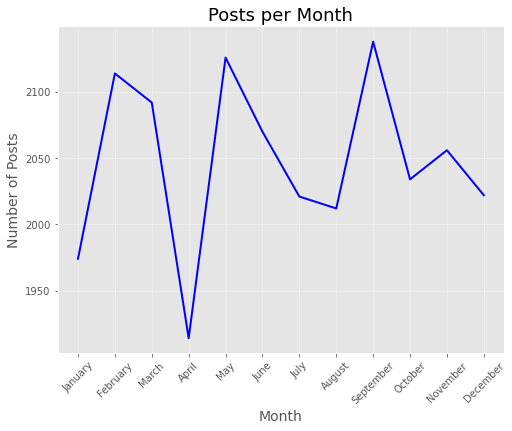

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

final_df['Month'] = final_df['Datetime'].dt.strftime('%B')

posts_per_month = final_df.groupby(final_df['Month']).size()

# Sort the series by index in ascending order
posts_per_month = posts_per_month.sort_index()

# Set figure size and style
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Create line plot
plt.plot(posts_per_month.index, posts_per_month.values, color='blue', linewidth=2)

# Set x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(posts_per_month.index, month_names, rotation=45)

# Add grid
plt.grid(alpha=0.4)

# Add title and axis labels
plt.title('Posts per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show plot
plt.show()


🎯 Observation: he month with the highest number of posts is May, with 2138 posts, while February has the lowest number of posts, with 1914. The total number of posts varies from month to month, with a peak in May and a trough in February. Overall, the number of posts per month is relatively consistent, with the highest and lowest months differing by only 224 posts.

In [60]:


# create ExcelWriter object
writer = pd.ExcelWriter('my_data.xlsx', engine='xlsxwriter')

# write cleaned dataset to first sheet
final_df.to_excel(writer, sheet_name='Cleaned Data')

# write top 5 categories to second sheet
top_categories.to_excel(writer, sheet_name='Top 5 Categories')

# save the workbook
writer.save()

In [61]:
final_df.to_csv('df_clean.csv')


# 📌 Conclusion and Insights:


# 🎯 animals, healthy eating, technology, science, and cooking. The highest-scoring category is animals with a total score of 69,548, followed closely by healthy eating with a score of 69,067. Technology ranks third with a score of 67,472, followed by science with a score of 66,043, and cooking with a score of 63,982.


# 🎯 we can see that there is relatively consistent posting activity throughout the year, with the number of posts in each month being within a range of 1914 to 2138. However, it's worth noting that there are slightly more posts in September and May compared to the other months, which could indicate higher engagement or more popular content being shared during those months.



# 🎯 Focus on creating more photo content as it is the most popular content type with 6589 posts, compared to 6245 videos, 6079 GIFs, and 5660 audio posts.


